# National Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing the CSVs
nyc_file = "../New York/violent_crime_df_ny.csv"
la_file = "../Los Angeles/LA_Violent_Crime.csv"
tampa_file = "../Tampa/Tampa_violent_crime.csv"
chicago_file = "../Chicago/Chicago_Violent_Crime.csv"
dc_file = "../DC_Crime/DC_Violent_Crime.csv"
US_file = "National Data/FBI_US_Crime_Averages.csv"

nyc_data = pd.read_csv(nyc_file)
la_data = pd.read_csv(la_file)
tampa_data = pd.read_csv(tampa_file)
chicago_data = pd.read_csv(chicago_file)
dc_data = pd.read_csv(dc_file)

US_data = pd.read_csv(US_file)
US_data.columns.values

array(['Year', 'Population1', 'Violent\ncrime2',
       'Violent \ncrime \nrate ',
       'Murder and\nnonnegligent \nmanslaughter',
       'Murder and \nnonnegligent \nmanslaughter \nrate ',
       'Rape\n(revised \ndefinition)3',
       'Rape\n(revised \ndefinition) \nrate3',
       'Rape\n(legacy \ndefinition)4',
       'Rape\n(legacy \ndefinition) \nrate4', 'Robbery',
       'Robbery \nrate ', 'Aggravated \nassault',
       'Aggravated \nassault rate ', 'Property \ncrime',
       'Property \ncrime \nrate ', 'Burglary', 'Burglary \nrate ',
       'Larceny-\ntheft', 'Larceny-\ntheft rate ',
       'Motor \nvehicle \ntheft', 'Motor \nvehicle \ntheft \nrate ',
       'Unnamed: 22', 'Unnamed: 23'], dtype=object)

## Crime Rates

In [3]:
#Clean up FBI US Data
US_data = US_data.rename(columns = {'Violent \ncrime \nrate ': 'value_US', 'Year': 'year'})
US_data = US_data[['year', 'value_US']]

In [4]:
#Merge the dataframes using only the appropriate years
national_data = pd.merge(nyc_data, la_data, on='year', how='outer', suffixes=('_NYC', '_LA'))

national_data = pd.merge(national_data, chicago_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Chi'})

national_data = pd.merge(national_data, tampa_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Tamp'})

dc_data = dc_data.rename(columns={'Year': 'year'})
national_data = pd.merge(national_data, dc_data, on='year', how='outer')
national_data = national_data.rename(columns = {'Violent Crime Rate': 'value_DC'})

national_data = national_data[['year', 'value_NYC', 'value_LA', 'value_Chi', 'value_Tamp', 'value_DC']]

national_data = national_data.rename(columns = {'value_NYC': 'New York City', 'value_LA': 'Los Angeles', 'value_Chi': 'Chicago', 
                                                'value_Tamp': 'Tampa', 'value_DC': 'Washington D.C.'})

national_data = pd.merge(national_data, US_data, on='year', how='left')
national_data = national_data.rename(columns = {'value_US': 'U.S. Average'})

#national_data.plot(kind='line', x='year', figsize=(15,10))
national_data.to_csv('Comparative_Crime_Data.csv')

Text(0.5, 1.0, 'Violent Crime Rate Comparison')

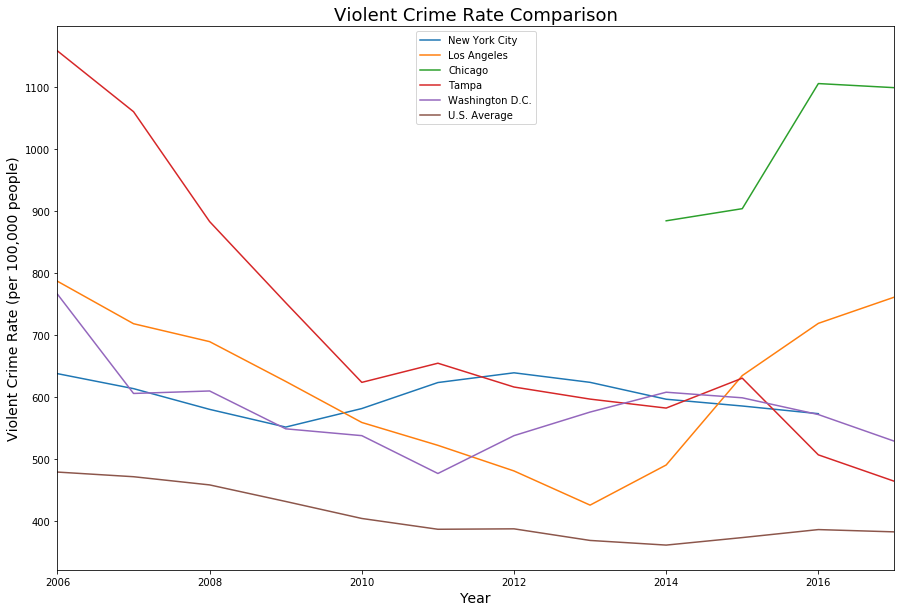

In [19]:
national_data.plot(kind='line', x = 'year', figsize = (15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Violent Crime Rate (per 100,000 people)', size=14)
plt.title('Violent Crime Rate Comparison', size=18)

Text(0.5, 1.0, 'Crime Rate by Year Comparison')

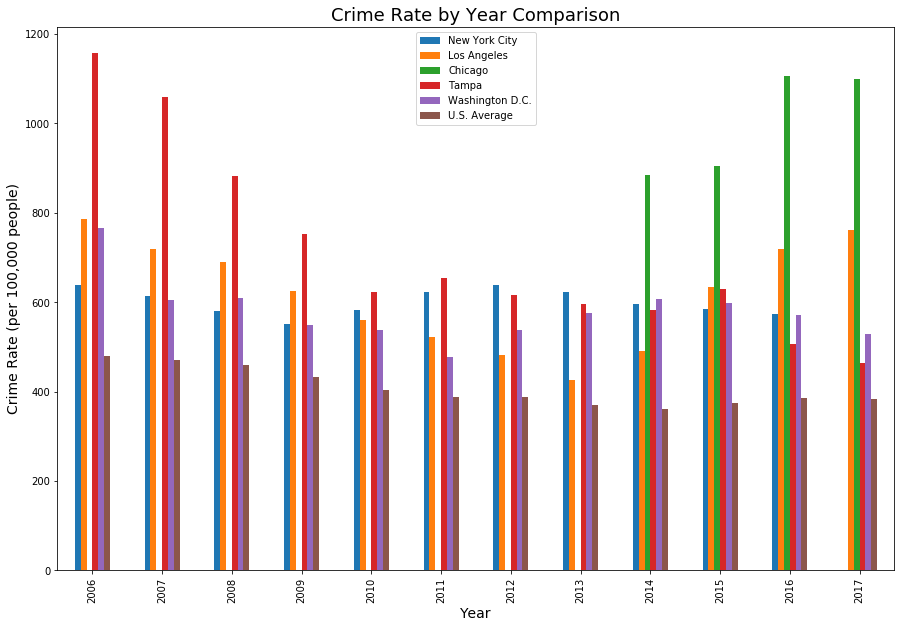

In [78]:
national_data.plot(kind='bar', x='year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Crime Rate (per 100,000 people)', size=14)
plt.title('Crime Rate by Year Comparison', size=18)

## Graduation Rates

In [6]:
nyc_grad_file = "../New York/HighSchoolGradRateNewYork.csv"
la_grad_file = "../Los Angeles/LA_education.csv"
chi_grad_file = "../Chicago/Chicago_Graduation_Rates.csv"
tamp_grad_file = "../Tampa/Tampa_education.csv"
dc_grad_file = "../DC_Crime/DC_Grad_Rate.csv"
us_grad_file = "National Data/National_Graduation_Rates.csv"

nyc_grad = pd.read_csv(nyc_grad_file)
la_grad = pd.read_csv(la_grad_file)
chi_grad = pd.read_csv(chi_grad_file)
tamp_grad = pd.read_csv(tamp_grad_file)
dc_grad = pd.read_csv(dc_grad_file)
us_grad = pd.read_csv(us_grad_file)

tamp_grad = tamp_grad[['Year', 'Graduation Rate']]

nyc_grad = nyc_grad.rename(columns = {'Graduation Rate %': 'New York City'})
la_grad = la_grad.rename(columns = {'Graduation Rate': 'Los Angeles'})
chi_grad = chi_grad.rename(columns = {'Graduation Rate': 'Chicago', '\ufeffYears': 'Year'})
tamp_grad = tamp_grad.rename(columns = {'Graduation Rate': 'Tampa'})
dc_grad = dc_grad.rename(columns = {'Graduation_Rate': 'Washington D.C.'})
us_grad = us_grad.rename(columns = {'Graduation Rate': 'U.S. Average'})

In [7]:
national_grad = pd.merge(nyc_grad, la_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, chi_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, tamp_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, dc_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, us_grad, on='Year', how='right')
national_grad

,Year,New York City,Los Angeles,Chicago,Tampa,Washington D.C.,U.S. Average
0,2011,79.3,73.9,80.2,84.6,87.1,79
1,2012,79.4,74.2,80.5,85.5,87.5,80
2,2013,79.8,74.5,81.1,85.9,88.4,81
3,2014,80.1,74.9,81.6,86.2,88.9,82
4,2015,80.3,75.5,82.3,86.6,89.3,83
5,2016,80.8,75.9,83.1,87.0,90.0,84
6,2017,81.1,76.4,83.8,87.1,90.3,85


Text(0.5, 1.0, 'Graduation Rate Comparison')

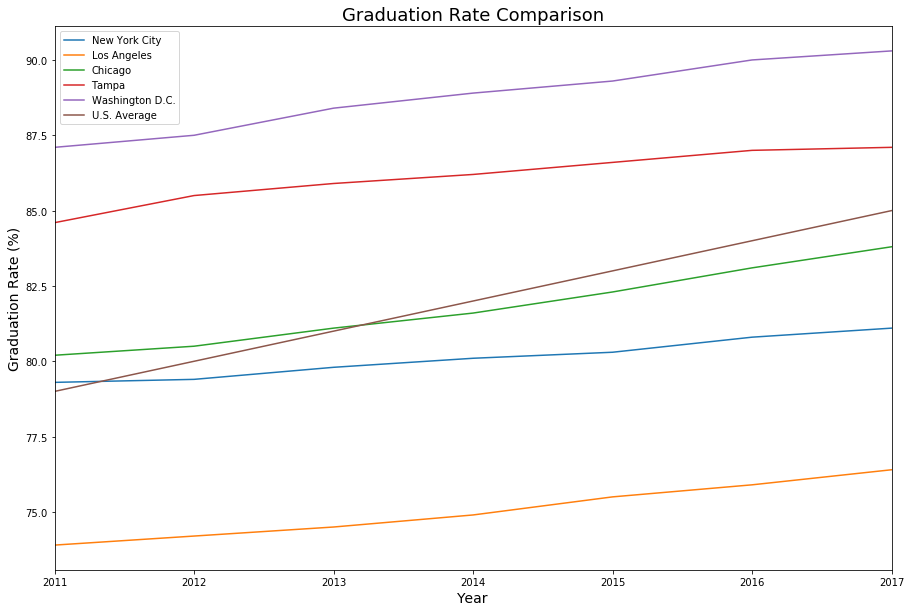

In [20]:
national_grad.plot(kind='line', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate Comparison', size=18)

Text(0.5, 1.0, 'Graduation Rate by Year Comparison')

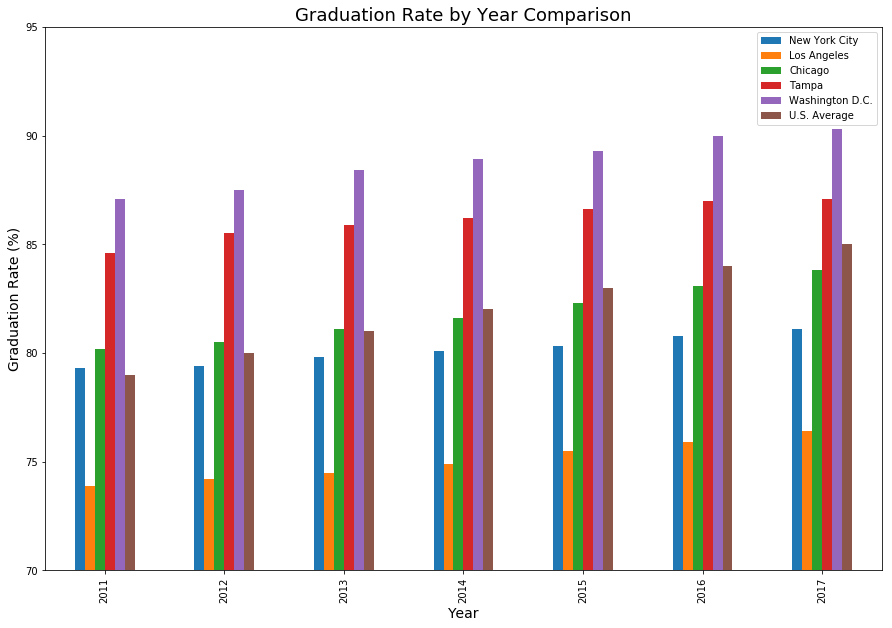

In [77]:
national_grad.plot(kind='bar', x='Year', figsize=(15,10))
plt.ylim(70, 95)
plt.xlabel('Year', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate by Year Comparison', size=18)

## Income

### Poverty Rate

In [9]:
nyc_pov_file = "../New York/PercentEarningNewYork.csv"
la_pov_file = "../Los Angeles/LA_income.csv"
chi_pov_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_pov_file = "../Tampa/Tampa_poverty.csv"
dc_pov_file = "../DC_Crime/DC_Perc_Poverty.csv"
us_pov_file = "National Data/National_Poverty_Rates.csv"

nyc_poverty = pd.read_csv(nyc_pov_file)
la_poverty = pd.read_csv(la_pov_file)
chi_poverty = pd.read_csv(chi_pov_file)
tamp_poverty = pd.read_csv(tamp_pov_file)
dc_poverty = pd.read_csv(dc_pov_file)
us_poverty = pd.read_csv(us_pov_file)

us_poverty.columns.values

array(['Year', 'Poverty Rate', 'Median Income'], dtype=object)

In [10]:
#Data Cleanup
#New York
nyc_poverty['New York City'] = nyc_poverty['<$10,000 %'] + nyc_poverty['$10,000 - $14,999 %'] + nyc_poverty['$15,000 - $24,999 %']
nyc_poverty = nyc_poverty[['Year', 'New York City']]

#Los Angeles
la_poverty['Los Angeles'] = la_poverty['% 15000-24999'] + la_poverty['% 10000-14999'] + la_poverty['% <10000']
la_poverty = la_poverty[['Year', 'Los Angeles']]

#Chicago
chi_poverty['Chicago'] = chi_poverty['< $10,000'] + chi_poverty['$10,000 - $14,999'] + chi_poverty['$15,000 - $24,999']
chi_poverty = chi_poverty.rename(columns={'\ufeffYears': 'Year'})
chi_poverty = chi_poverty[['Year', 'Chicago']]

#Tampa
tamp_poverty = tamp_poverty.rename(columns = {'% <25000': 'Tampa'})
tamp_poverty = tamp_poverty[['Year', 'Tampa']]

#Washington D.C.
dc_poverty = dc_poverty.rename(columns = {'Percent Below Poverty Line': 'Washington D.C.'})
dc_poverty = dc_poverty[['Year', 'Washington D.C.']]

#United States
us_poverty = us_poverty.rename(columns = {'Poverty Rate': 'U.S. Average'})
us_poverty = us_poverty[['Year', 'U.S. Average']]

In [11]:
national_poverty = pd.merge(nyc_poverty, la_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, chi_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, tamp_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, dc_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, us_poverty, on='Year', how='left')
national_poverty

,Year,New York City,Los Angeles,Chicago,Tampa,Washington D.C.,U.S. Average
0,2010,21.3,31.3,23.1,24.6,12.3,15.1
1,2011,20.5,30.1,21.5,22.7,11.1,15.0
2,2012,20.1,29.5,20.9,22.8,10.6,15.0
3,2013,20.0,29.8,20.5,21.8,10.0,14.8
4,2014,19.7,29.5,20.2,21.1,9.4,14.8
5,2015,19.6,29.5,20.1,20.9,9.4,13.5
6,2016,18.9,28.4,19.2,21.1,9.4,12.7
7,2017,17.9,26.7,17.8,20.7,8.6,12.3


Text(0.5, 1.0, 'Poverty Rate Comparison')

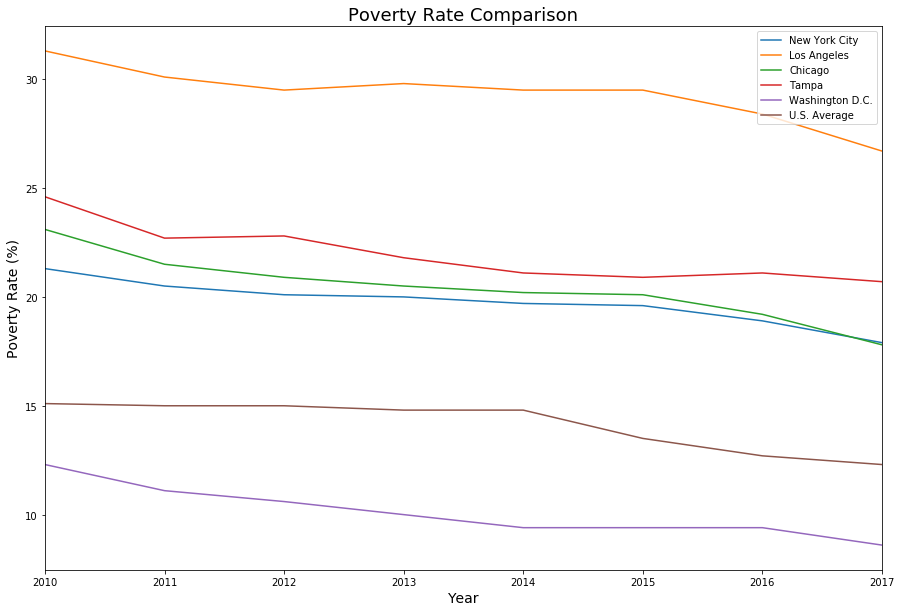

In [21]:
national_poverty.plot(kind='line', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Poverty Rate (%)', size=14)
plt.title('Poverty Rate Comparison', size=18)

Text(0.5, 1.0, 'Poverty Rate by Year Comparison')

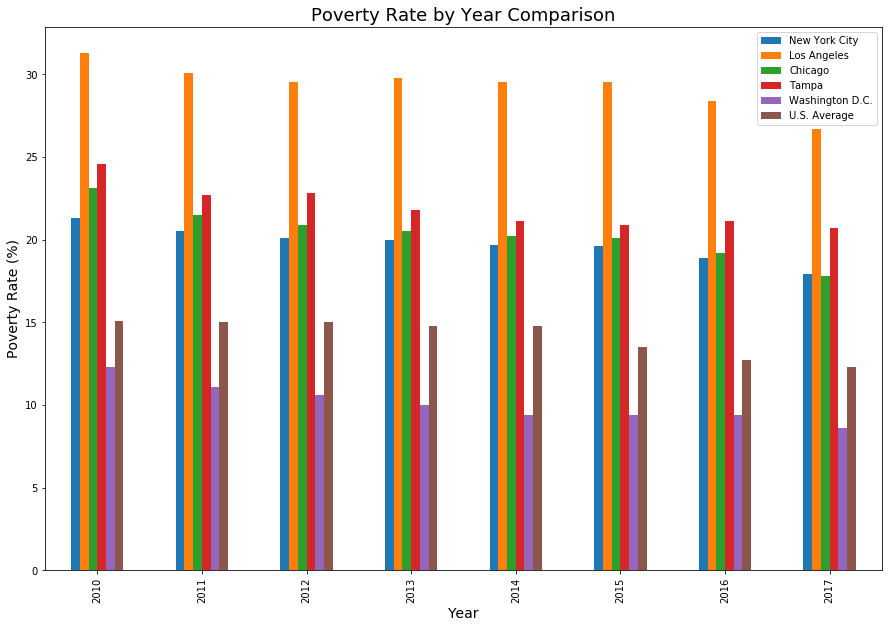

In [76]:
national_poverty.plot(kind='bar', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Poverty Rate (%)', size=14)
plt.title('Poverty Rate by Year Comparison', size=18)

### Median Income

In [47]:
nyc_inc_file = "../New York/PercentEarningNewYork.csv"
la_inc_file = "../Los Angeles/LA_income.csv"
chi_inc_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_inc_file = "../Tampa/Tampa_income.csv"
dc_inc_file = "../DC_Crime/DC_Med_Income.csv"
us_inc_file = "National Data/National_Poverty_Rates.csv"

nyc_income = pd.read_csv(nyc_inc_file)
la_income = pd.read_csv(la_inc_file)
chi_income = pd.read_csv(chi_inc_file)
tamp_income = pd.read_csv(tamp_inc_file)
dc_income = pd.read_csv(dc_inc_file)
us_income = pd.read_csv(us_inc_file)

us_income

,Year,Poverty Rate,Median Income
0,2017,12.3,NaN
1,2016,12.7,31099.0
2,2015,13.5,30622.0
3,2014,14.8,29154.0
4,2013,14.8,28518.0
5,2012,15.0,28213.0
6,2011,15.0,28366.0
7,2010,15.1,28815.0
8,2009,14.3,29235.0
9,2008,13.2,29556.0


In [48]:
nyc_income = nyc_income.rename(columns ={'Median Earnings $': 'New York City'})
nyc_income = nyc_income[['Year', 'New York City']]

la_income = la_income.rename(columns={'Median Income': 'Los Angeles'})
la_income = la_income[['Year', 'Los Angeles']]

chi_income = chi_income.rename(columns = {'\ufeffYears': 'Year', 'med': 'Chicago'})
chi_income = chi_income[['Year', 'Chicago']]

tamp_income = tamp_income.rename(columns = {'Median Income': 'Tampa'})
tamp_income = tamp_income[['Year', 'Tampa']]

dc_income = dc_income.rename(columns ={'Median Earnings': 'Washington D.C.'})

us_income = us_income.rename(columns ={'Median Income': 'U.S. Average'})
us_income = us_income[['Year', 'U.S. Average']]

In [55]:
national_income = pd.merge(nyc_income, la_income, on='Year', how='outer')
national_income = pd.merge(national_income, chi_income, on='Year', how='outer')
national_income = pd.merge(national_income, tamp_income, on='Year', how='outer')
national_income = pd.merge(national_income, dc_income, on='Year', how='outer')
national_income = pd.merge(national_income, us_income, on='Year', how='left')
national_income

,Year,New York City,Los Angeles,Chicago,Tampa,Washington D.C.,U.S. Average
0,2010,32841,26239,30440,27419.0,41171,28815.0
1,2011,33743,26530,30948,28860.0,43137,28366.0
2,2012,34203,26446,31052,29069.0,44423,28213.0
3,2013,34578,26151,31228,29739.0,45231,28518.0
4,2014,34973,26295,31610,30551.0,46529,29154.0
5,2015,35330,26505,31703,30717.0,47384,30622.0
6,2016,35990,27101,32418,30936.0,48059,31099.0
7,2017,36789,28794,34420,31344.0,50810,NaN


Text(0.5, 1.0, 'Median Income Comparison')

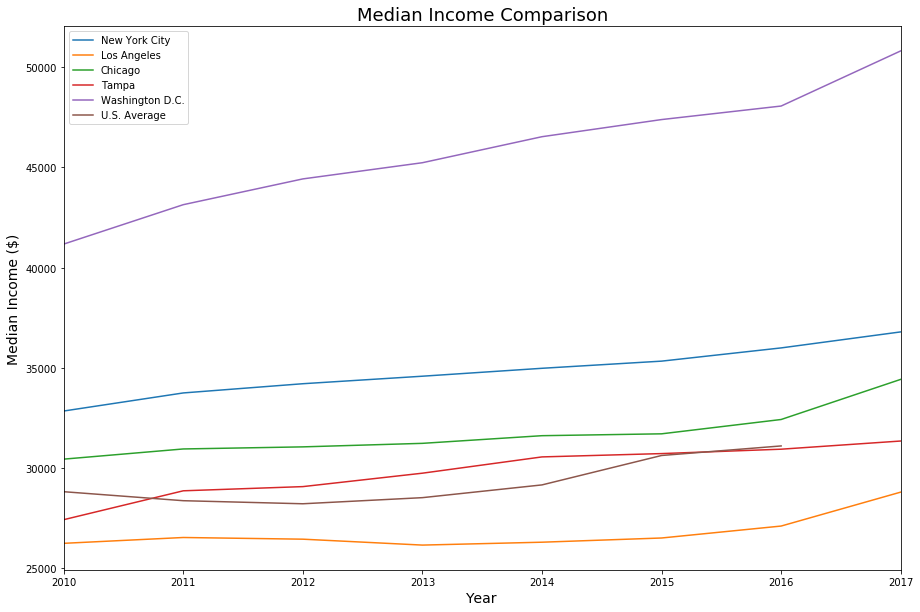

In [62]:
national_income.plot(kind='line', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Median Income ($)', size=14)
plt.title('Median Income Comparison', size=18)

Text(0.5, 1.0, 'Median Income by Year Comparison')

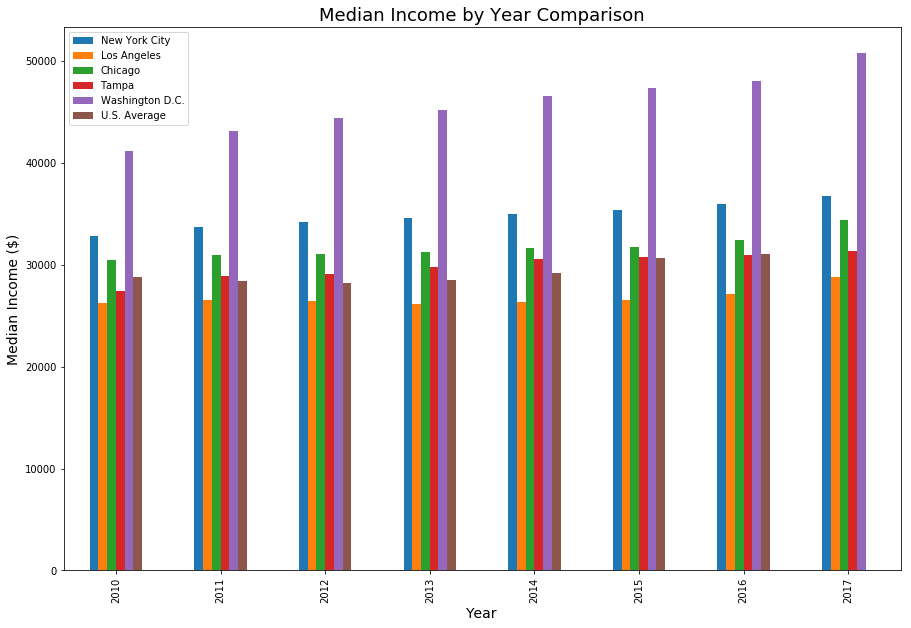

In [75]:
national_income.plot(kind='bar', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Median Income ($)', size=14)
plt.title('Median Income by Year Comparison', size=18)